# Introduction 

This notebook generates the figures involved in Sherry's Chapter 1, which are used to support and complete the chapter  1 story. The story is motivated by the observed submesoscale eddies on the Australian North West Shelf (NWS) during the winter season, as captured from the Himawari-8 satellite. To duplicate these physical processes in a simplified way, we applied the numerical model (SUNTANS) to investigate the formation of these instabilities and study how varied domain conditions affect the generation mechanism.

In [2]:
#import package
import Chapter_1_functions as chap1_funcs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# set tick parameters labelsize for the entire notebook
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8


In [4]:
# obtain the customerised colormap
cmap = plt.get_cmap('inferno_r')
cutted_inferno_r = chap1_funcs.truncate_colormap(cmap, 0, 0.8)
# set up the notebook reading path
savepath,loadpath=chap1_funcs.obtain_paths()

Fig 1-1

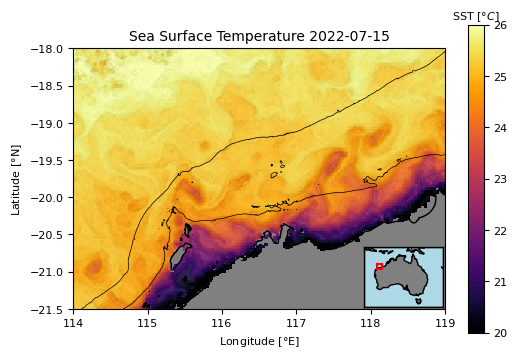

In [14]:
lat,lon,time,sst,bath=chap1_funcs.get_SST_n_bath(loadpath)
fig=plt.figure(figsize=(6,4))
cax,p2=chap1_funcs.plot_sst_satellite(fig,lat,lon,sst,bath,time)
fig.savefig(savepath+'Fig_1_1.jpg', format='jpg', 
            bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig 2-2

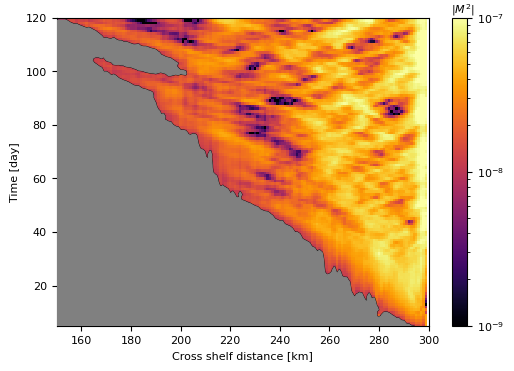

In [15]:
cs_path_vertices=chap1_funcs.obtain_cs_path(loadpath)
fig=plt.figure(figsize=(6,4))
PEZ_plot=chap1_funcs.plot_PEZ_of_new_M2(fig,loadpath,cs_path_vertices,ylims=(5,120),)
plt.savefig(savepath+'Fig_2_2.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig 3-1

In [6]:
run_number=32
ds_new_coord=xr.open_dataset(loadpath+'run{:02d}_new_coord.nc'.format(run_number))
up_bbl=ds_new_coord['up_bbl_coord']
vp_bbl=ds_new_coord['vp_bbl_coord']  
rho_bbl=ds_new_coord['rho_bbl_coord']

In [ ]:
run_number=32
ds_new_coord=xr.open_dataset(loadpath+'run{:02d}_new_coord.nc'.format(run_number))
up_bbl=ds_new_coord['up_bbl_coord'][35,2,:,:]
vp_bbl=ds_new_coord['vp_bbl_coord'][35,2,:,:]
rho_bbl=ds_new_coord['rho_bbl_coord'][35,2,:,:]

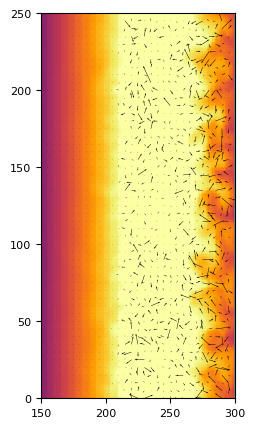

In [9]:

cross=np.arange(300)
along=np.arange(250)
i=35
xlims=(150,300)
ylims_KE=(0,2e-3)
ylims_topview=(0,250)
ylims_sideview=(-220,0)

fif=plt.figure(figsize=(2.5,5))
ax2=fif.add_subplot(111)

p2,q2=chap1_funcs.plot_rho_w_quiver(ax2,cross,along,rho_bbl[i,2,...],
                up_bbl[i,2,...],vp_bbl[i,2,...],xlims,ylims_topview,vmin=1000.1,vmax=1000.5)

In [10]:
smooth_up=up_bbl[i,2,...].rolling(along_shelf=5,cross_shelf=5,center=True).mean(
        dim={"along_shelf","cross_shelf"},skipna=True)
smooth_vp=vp_bbl[i,2,...].rolling(along_shelf=5,cross_shelf=5,center=True).mean(
        dim={"along_shelf","cross_shelf"},skipna=True)

# up_2ly_abs_t0=smooth_up.values[:,np.arange(300)]
# vp_2ly_abs_t0=smooth_vp.values[:,np.arange(300)]

C:\Users\22042055\AppData\Local\Temp\ipykernel_20288\1195740546.py:1: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['along_shelf', 'cross_shelf']'. Passing the 'dim' kwarg to reduction operations has no effect.
  smooth_up=up_bbl[i,2,...].rolling(along_shelf=5,cross_shelf=5,center=True).mean(
C:\Users\22042055\AppData\Local\Temp\ipykernel_20288\1195740546.py:3: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['along_shelf', 'cross_shelf']'. Passing the 'dim' kwarg to reduction operations has no effect.
  smooth_vp=vp_bbl[i,2,...].rolling(along_shelf=5,cross_shelf=5,center=True).mean(


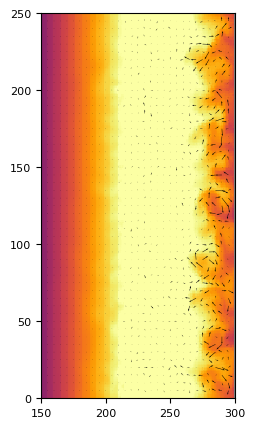

In [11]:
fif=plt.figure(figsize=(2.5,5))
ax2=fif.add_subplot(111)

p2,q2=chap1_funcs.plot_rho_w_quiver(ax2,cross,along,rho_bbl[i,2,...],
                smooth_up,smooth_vp,xlims,ylims_topview,vmin=1000.1,vmax=1000.5)

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_1_functions.py:553: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


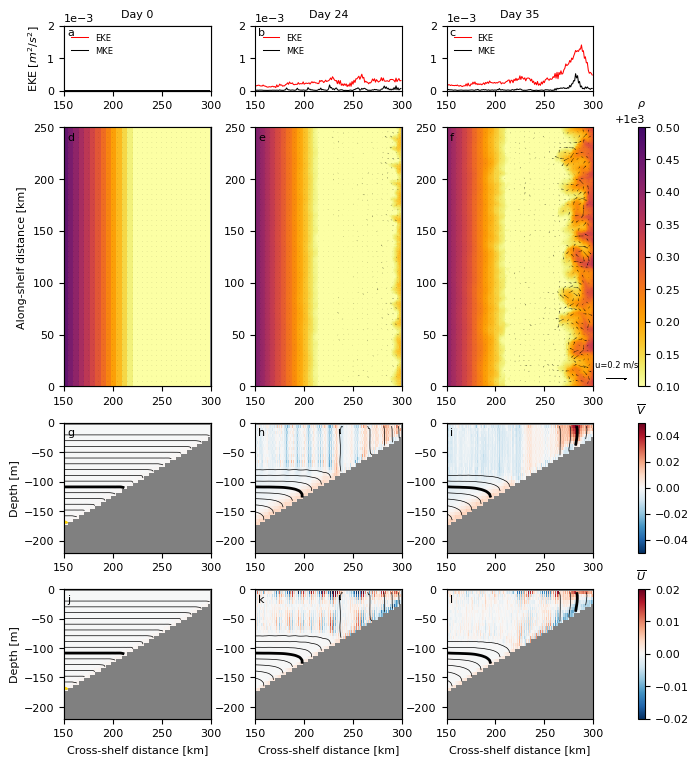

In [5]:
## Fig 3-1: Time series of mean and eddy field of the base case
sel_dates=np.array([0,24,35]) # first day ,10 Tis after ti and t0 of the base case

xlims=(150,300)
ylims_KE=(0,2e-3)
ylims_topview=(0,250)
ylims_sideview=(-220,0)


fig=plt.figure(figsize=(7.5,9))
plot=chap1_funcs.plot_snapshots_basecase_in_time(fig,sel_dates,loadpath,
                                        xlims,ylims_topview,ylims_sideview,ylims_KE,
                                        cross=np.arange(300),along=np.arange(250))

fig.savefig(savepath+'Fig_3_1.jpg', format='jpg', 
                 bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig 3-2

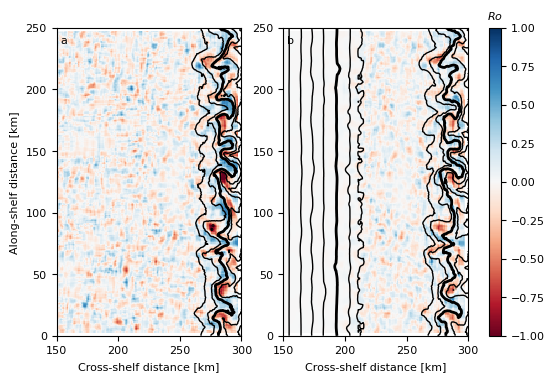

In [18]:
fig=plt.figure(figsize=(6,4))
plot_two_planes=chap1_funcs.plot_two_plane_comparsion(fig,loadpath)
fig.savefig(savepath+'Fig_3_2.jpg', format='jpg', 
            bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig 3-3

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_1_functions.py:708: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


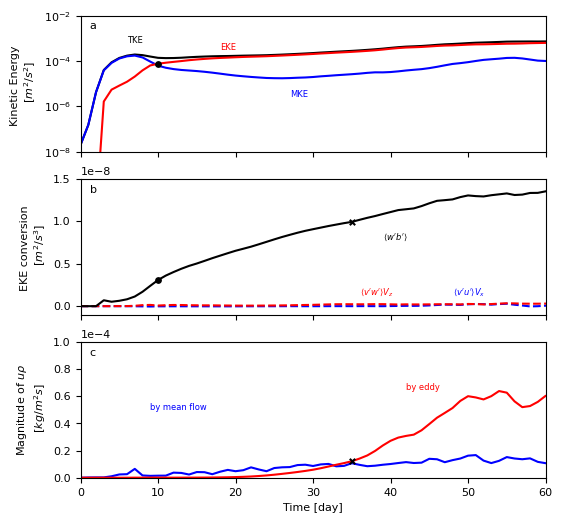

In [19]:
xlims=(0,60)
ylims_KEs=(1e-8,1e-2)
ylims_budget=(-0.1e-8,1.5e-8)
ylims_trans=(0,0.1e-3)
run_date=np.arange(120)

fig=plt.figure(figsize=(6,6))
energy_plot=chap1_funcs.plot_energetic_analysis(fig,loadpath,xlims,ylims_KEs,ylims_budget,ylims_trans,)

plt.savefig(savepath+'Fig_3_3.jpg', format='jpg', 
        bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

obtain all run cases summary

In [4]:
## obtain all run cases summary
run_numbers,run_number_names,t0s,tis,Bs,Slope_burgers,alphas,N0s,fs=chap1_funcs.obtain_run_case_summary(loadpath)

Fig 4-1

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_1_functions.py:840: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


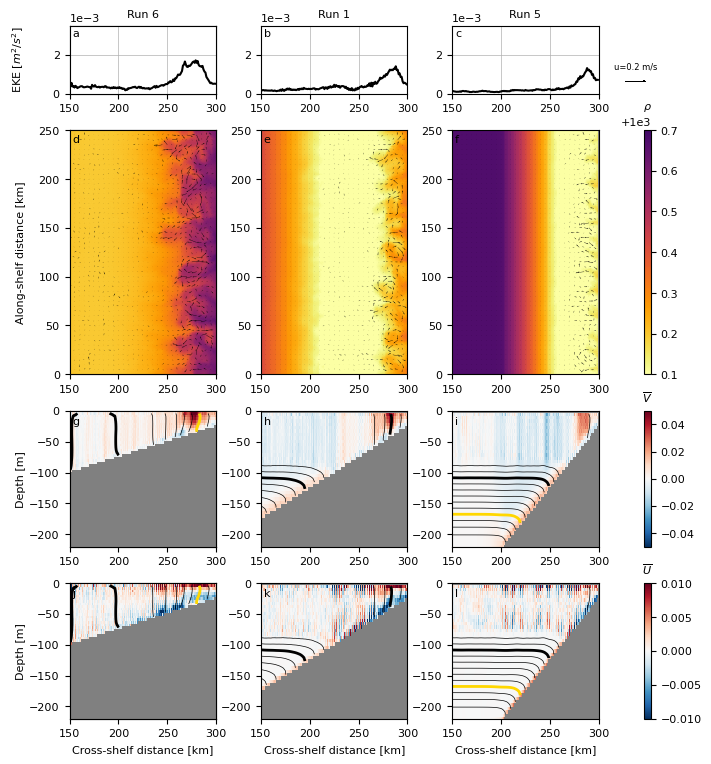

In [10]:
fig=plt.figure(figsize=(7.5,9))
case_compare_plot=chap1_funcs.plot_case_compare_snapshots( fig,'alpha',t0s,loadpath,ylims_KEs=(0,3.5e-3),rho_max=1000.7,)
fig.savefig(savepath+'Fig_4_1.jpg', format='jpg', 
               bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig_4_2

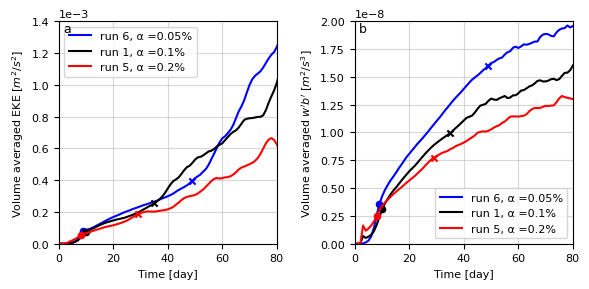

In [22]:
fig=plt.figure(figsize=(6,3))
compare_instability=chap1_funcs.plot_case_compare_wb_EKE(fig,'alpha',tis,t0s,loadpath,xlims=(0,80),ylims_EKEs=(0,1.4e-3),)
plt.savefig(savepath+'Fig_4_2.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig_4_3

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_1_functions.py:840: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


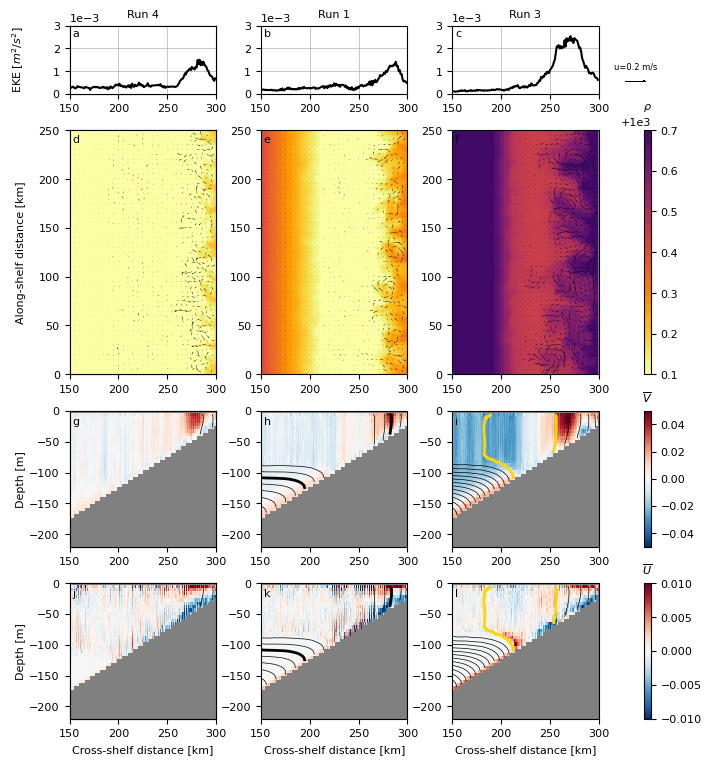

In [8]:
fig=plt.figure(figsize=(7.5,9))
case_compare_plot=chap1_funcs.plot_case_compare_snapshots(fig,'N0',t0s,loadpath)
fig.savefig(savepath+'Fig_4_3.jpg', format='jpg', 
               bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig_4_4

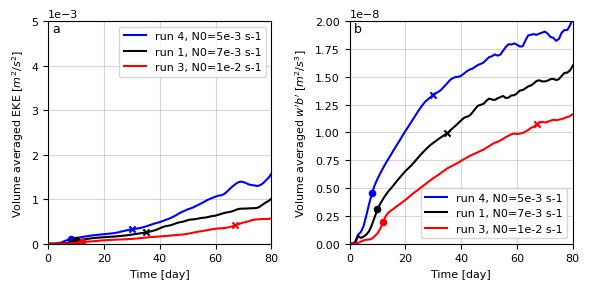

In [61]:
fig=plt.figure(figsize=(6,3))
compare_instability=chap1_funcs.plot_case_compare_wb_EKE(fig,'N0',tis,t0s,loadpath,xlims=(0,80),ylims_EKEs=(0,5e-3),)
# plt.savefig(savepath+'Fig_4_4.jpg', format='jpg', 
#          bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig 4_5

c:\Users\22042055\OneDrive - The University of Western Australia\PhD\Year 4\local_notebook\Chapter_1_functions.py:840: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


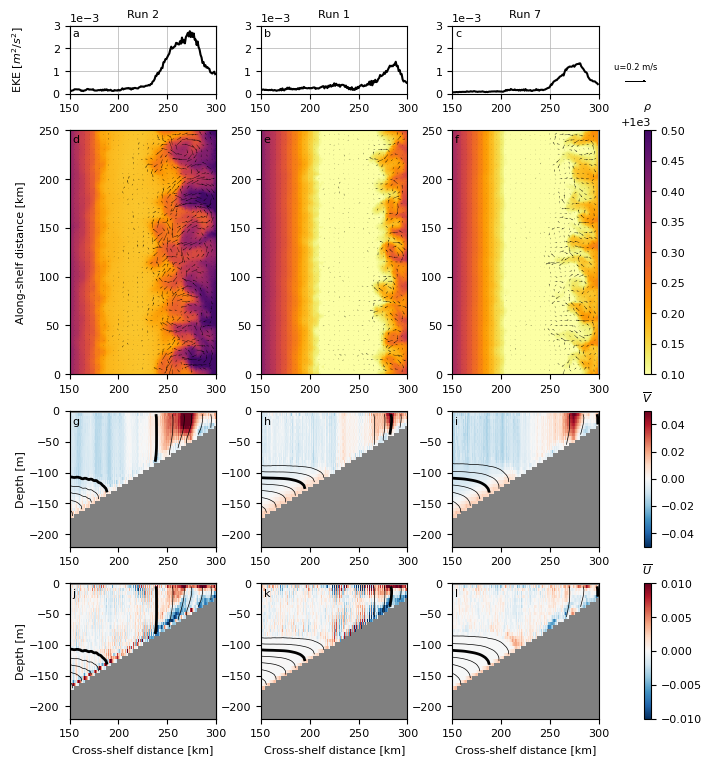

In [11]:

rho_max,rho_min=1000.5,1000.1

fig=plt.figure(figsize=(7.5,9))
case_compare_plot=chap1_funcs.plot_case_compare_snapshots(fig,'force',t0s,loadpath,rho_max=rho_max,rho_min=rho_min)
fig.savefig(savepath+'Fig_4_5.jpg', format='jpg', 
               bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig 4_6

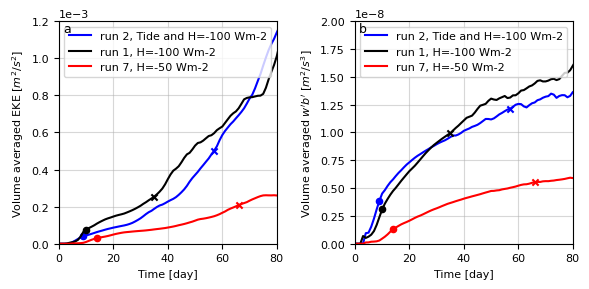

In [27]:
fig=plt.figure(figsize=(6,3))
compare_instability=chap1_funcs.plot_case_compare_wb_EKE(fig,'force',tis,t0s,loadpath,ylims_EKEs=(0,1.2e-3),xlims=(0,80))
plt.savefig(savepath+'Fig_4_6.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig_4_7

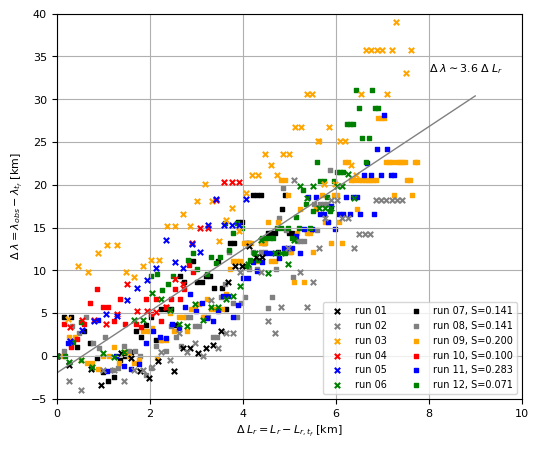

In [8]:
fig=plt.figure(figsize=(6,5))
lambda_rossby_radius_plot=chap1_funcs.plot_lambda_vs_Rossby_radius(fig,loadpath,xlims=(0,10),ylims=(-5,40),)
fig.savefig(savepath+'Fig_4_7.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Fig_4_8


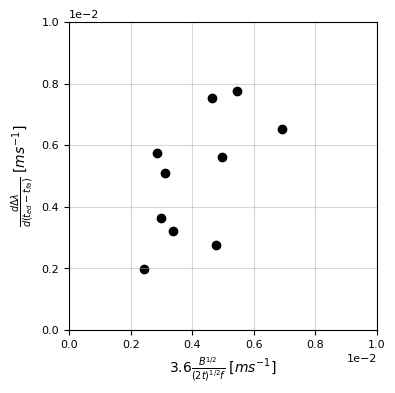

In [6]:
fig=plt.figure(figsize=(4,4))
lamdba_dt_comapre=chap1_funcs.plot_dLr_dt_compare(fig,loadpath,xlims=(0,0.01),ylims=(0,0.01),coef=3.6)
plt.savefig(savepath+'Fig_4_8.jpg', format='jpg', 
        bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [12]:
dlambda_dt_obs,dlambda_dt_theory=chap1_funcs.obtain_dLr_dt(loadpath)
# np.polyfit(dlambda_dt_obs,dlambda_dt_theory,1)
# obtain a correlation coefficient 
# np.corrcoef(dlambda_dt_obs,dlambda_dt_theory) # ignore nan
# obtain a correlation coefficient
np.corrcoef(dlambda_dt_obs[~np.isnan(dlambda_dt_obs)],dlambda_dt_theory[~np.isnan(dlambda_dt_obs)])

array([[1.        , 0.75872133],
       [0.75872133, 1.        ]])

Fig_4_9

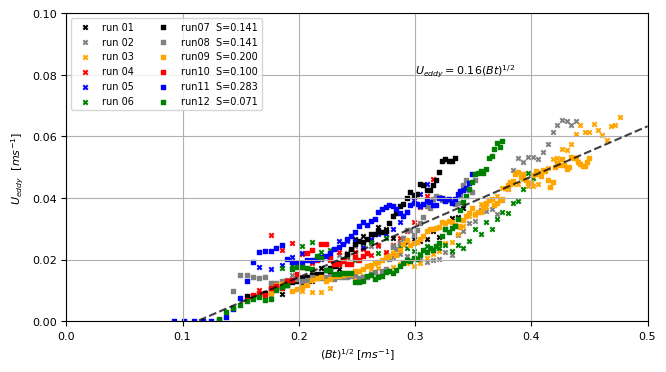

In [7]:
fig=plt.figure(figsize=(7.5,4))
Ueddy_Bt=chap1_funcs.plot_Ueddy_Bt(fig,loadpath)
fig.savefig(savepath+'Fig_4_9.jpg', format='jpg', 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

Appendix plots

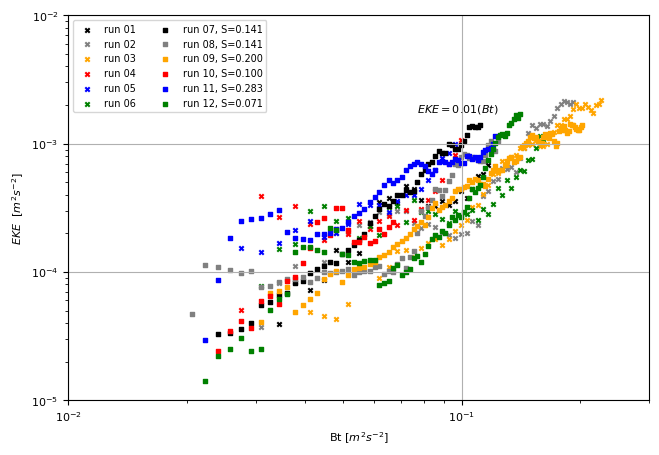

In [14]:
fig=plt.figure(figsize=(7.5,5))
EKE_Bt_plot=chap1_funcs.plot_EKE_Bt(fig,loadpath,xlims=(1e-2,3e-1),)
fig.savefig(savepath+'EKE_Bt.jpg', format='jpg', 
                bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

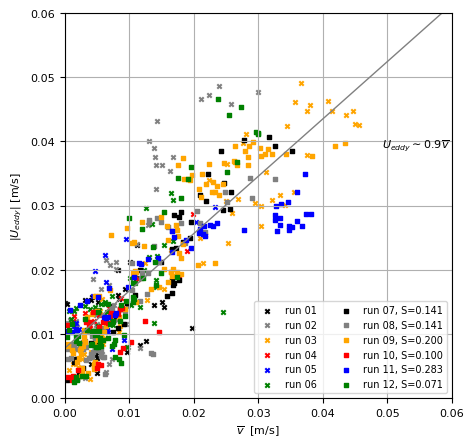

In [5]:

fig=plt.figure(figsize=(5,5))
Ueddy_Vbar_plot=chap1_funcs.plot_Ueddy_Vbar(fig,loadpath,xlims=(0,0.06),ylims=(0,0.06))
fig.savefig(savepath+'u_eddy_vs_vbar_sum.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [ ]:
fig=plt.figure(figsize=(6,6))
p1,p2=chap1_funcs.plt_case_comparsion_of_urho(fig,loadpath,'alpha',tis,t0s)
plt.savefig(savepath+'u_rho_compare_alphas.jpg', format='jpg', 
        bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [ ]:
fig=plt.figure(figsize=(6,6))
p1,p2=chap1_funcs.plt_case_comparsion_of_urho(fig,loadpath,'N0',tis,t0s)
plt.savefig(savepath+'u_rho_compare_N0s.jpg', format='jpg', 
        bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [ ]:
fig=plt.figure(figsize=(6,6))
p1,p2=chap1_funcs.plt_case_comparsion_of_urho(fig,loadpath,'force',tis,t0s)
plt.savefig(savepath+'u_rho_compare_forces.jpg', format='jpg', 
        bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

In [37]:
MLD_theory_sum,MLD_obs_sum=chap1_funcs.obtain_theory_n_obs_MLD(loadpath)

In [50]:
t0s

<xarray.DataArray 't0' (run_number: 13)>
[13 values with dtype=float64]
Coordinates:
  * run_number  (run_number) int32 16 32 17 33 18 34 19 35 22 38 23 39 80

In [60]:
for i in range(len(t0s)):
    t0=int(t0s[i])
    print(run_number_names[i].values,MLD_obs_sum[i,t0].values)

7 88.00174399999999
1 88.00174399999999
8 93.50185299999998
2 110.00217999999997
9 77.001526
3 82.501635
10 104.50207099999997
4 121.00239799999996
11 93.52981800000002
5 82.52631000000001
12 84.87500000000001
6 93.36250000000003


ValueError: cannot convert float NaN to integer

(0.0, 120.0)

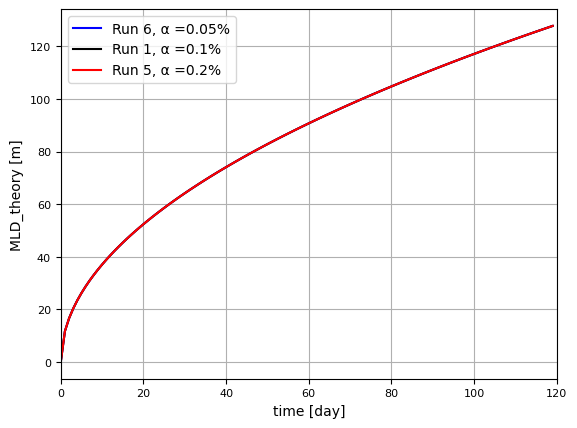

In [49]:
plt.plot(np.arange(120),MLD_theory_sum[11,:],label='Run 6, \u03B1 =0.05%',c='b')
plt.plot(np.arange(120),MLD_theory_sum[1,:],label='Run 1, \u03B1 =0.1%',c='k')
plt.plot(np.arange(120),MLD_theory_sum[9,:],label='Run 5, \u03B1 =0.2%',c='r')
plt.legend()
plt.grid()
plt.xlabel('time [day]')
plt.ylabel('MLD_theory [m]')
plt.xlim(0,120)

(0.0, 120.0)

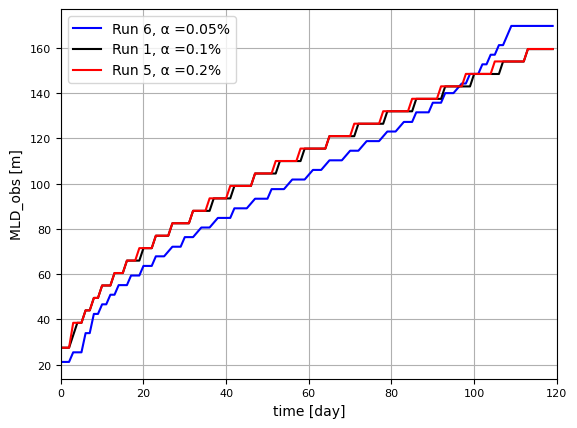

In [48]:
plt.plot(np.arange(120),MLD_obs_sum[11,:],label='Run 6, \u03B1 =0.05%',c='b')
plt.plot(np.arange(120),MLD_obs_sum[1,:],label='Run 1, \u03B1 =0.1%',c='k')
plt.plot(np.arange(120),MLD_obs_sum[9,:],label='Run 5, \u03B1 =0.2%',c='r')
plt.legend()
plt.grid()
plt.xlabel('time [day]')
plt.ylabel('MLD_obs [m]')
plt.xlim(0,120)

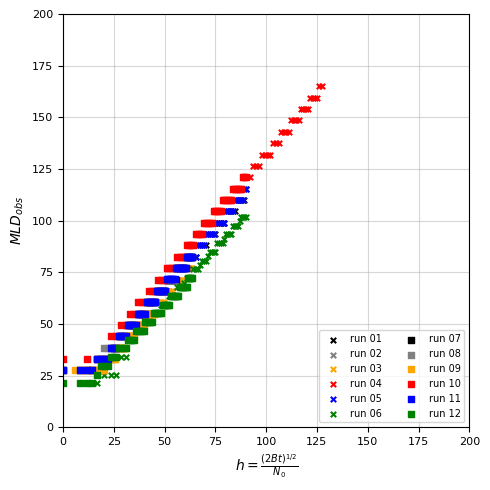

In [22]:

fig=plt.figure(figsize=(5,5))
compare_MLD=chap1_funcs.plot_MLD_obs_n_theory(loadpath,fig)

plt.savefig(savepath+'MLD_obs_vs_theory_sum.jpg',format='jpg', 
        bbox_inches = 'tight', pad_inches = 0.1, dpi=600)


In [ ]:
MLD_theory_sum,MLD_obs_sum=chap1_funcs.obtain_theory_n_obs_MLD(loadpath,run_date=np.arange(120))

In [ ]:
for k in range(1,12,2):
    run_number=run_numbers[k]
    run_number_name=run_number_names[k]
    t0=int(t0s[k])
    MLD_obs=MLD_obs_sum[k,t0]
    print('for run number of {:02d} (orginal number of {:02d}), the observed MLD on t0 (day {:02d}) is {:2.2f} m'.format(run_number_name,run_number,t0,MLD_obs))

for k in range(0,12,2):
    run_number=run_numbers[k]
    run_number_name=run_number_names[k]
    t0=int(t0s[k])
    MLD_obs=MLD_obs_sum[k,t0]
    print('for run number of {:02d} (orginal number of {:02d}), the observed MLD on t0 (day {:02d}) is {:2.1f} m'.format(run_number_name,run_number,t0,MLD_obs))

In [ ]:
for k in range(1,12,2):
    run_number=run_numbers[k]
    run_number_name=run_number_names[k]
    t0=int(t0s[k])
    MLD_theory=MLD_theory_sum[k,t0]
    print('for run number of {:02d} (orginal number of {:02d}), the theortical MLD on t0 (day {:02d}) is {:2.2f} m'.format(run_number_name,run_number,t0,MLD_theory))

for k in range(0,12,2):
    run_number=run_numbers[k]
    run_number_name=run_number_names[k]
    t0=int(t0s[k])
    MLD_theory=MLD_theory_sum[k,t0]
    print('for run number of {:02d} (orginal number of {:02d}), the theortical MLD on t0 (day {:02d}) is {:2.1f} m'.format(run_number_name,run_number,t0,MLD_theory))

Deprecated of Fig_4_2 v2

In [ ]:
fig=plt.figure(figsize=(6,3))
compare_instability=chap1_funcs.plot_case_compare_wb_w_EKEdt(fig,'alpha',tis,t0s,loadpath,xlims=(0,80), ylims_EKEdts=(0,5e-10))
plt.savefig(savepath+'Fig_4_2_v2.jpg', format='jpg', 
         bbox_inches = 'tight', pad_inches = 0.1, dpi=600)

keep a record of changing (qc)

ds_length=xr.open_dataset(loadpath+'Summary_Lr_obs_from_ave_up_qc_v2.nc')
ds_length['Lr_obs_qc'][8,7:9]=np.nan#lambda 
ds_length.to_netcdf(loadpath+'Summary_Lr_obs_from_ave_up_qc_v3.nc')

################
ds_length=xr.open_dataset(loadpath+'Summary_Lr_obs_from_ave_up_qc_v3.nc')
ds_length['Lr_obs_qc'][10,14:24]=np.nan
ds_length.to_netcdf(loadpath+'Summary_Lr_obs_from_ave_up_qc_v4.nc')

################
run_number=38
ds_eddy=xr.open_dataset(loadpath+'run{:02d}_u_eddy_at_EKE_max.nc'.format(run_number))
ds_eddy['u_eddy_mean_at_EKE_max'][ti:ti+5]=np.nan

################
run_number=35
ds_eddy=xr.open_dataset(loadpath+'run{:02d}_u_eddy_at_EKE_max.nc'.format(run_number))
ds_eddy['u_eddy_mean_at_EKE_max'][ti:ti+3]=np.nan

################
run_number=22
ds_eddy=xr.open_dataset(loadpath+'run{:02d}_u_eddy_at_EKE_max.nc'.format(run_number))
ds_eddy['u_eddy_mean_at_EKE_max'][ti:ti+16]=np.nan